# Sample 3D-scatter plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

### For daily values

In [2]:
ds = xr.open_dataset('dailyclim_ncep_daily_omega.1981_2010.nc')
ds = ds.sel(lon=slice(40,130),lat=slice(30,-30))

In [3]:
X,Y,Z = np.meshgrid(ds.lon[::2],ds.lat[::2],ds.level[::2])

In [4]:
Z.shape

(13, 19, 6)

In [5]:
ds.omega[0,::2,::2,::2].values.reshape(Z.shape).shape

(13, 19, 6)

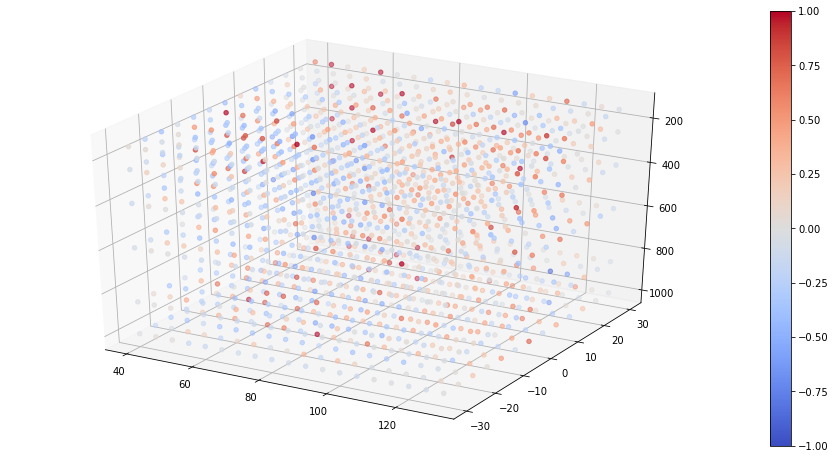

In [6]:
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection='3d')
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.05)

p = ax.scatter(X,Y,Z,c=-10*ds.omega[210:230,::2,::2,::2].mean(dim='dayofyear').values.reshape(Z.shape).reshape(Z.shape[0]*Z.shape[1]*Z.shape[2]),
               cmap = cm.coolwarm,vmin=-1,vmax=1)
#ax.coastlines()
fig.colorbar(p)
ax.invert_zaxis()

#p.clim(-0.5, 5.5)

### For monthly means

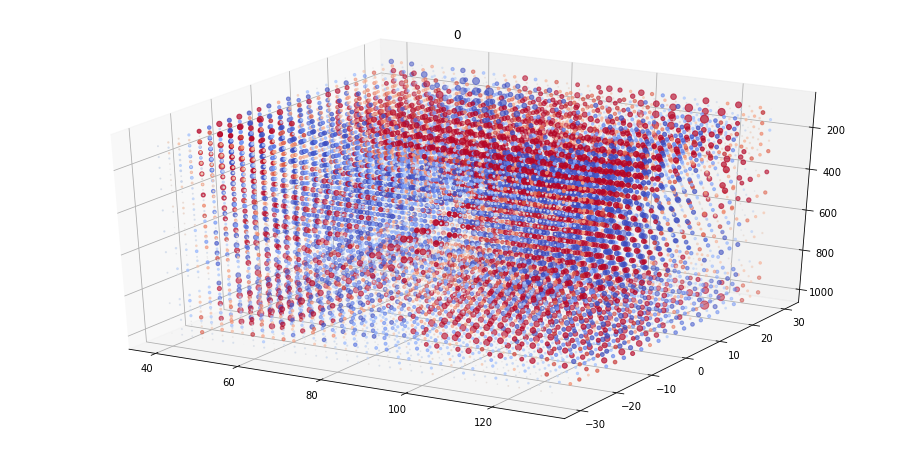

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

ds = xr.open_dataset('D:\chandrima_sample_plot\dailyclim_ncep_daily_omega.1981_2010.nc')
ds = ds.sel(lon=slice(40,130),lat=slice(30,-30))

time = pd.date_range('2000-01-01',periods=366,freq='D')
ds = ds.assign_coords(dayofyear=time)

#ds = ds.drop_dims('dayofyear')

ds = ds.resample(dayofyear='1M').mean(dim='dayofyear')

X,Y,Z = np.meshgrid(ds.lon[:],ds.lat[:],ds.level[:])

fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection='3d')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)

#text = ax.text(0,0,0)

def update(iternum):
    ax.clear()
    ax.set_title(iternum)
    #curVals  = np.random.rand(100).reshape(10, 10)
    
    #vmax     = np.max(curVals)
    #vmin     = np.min(curVals)
    #print(vmax)
    #levels   = np.linspace(vmin, vmax, 200, endpoint = True)
    p = ax.scatter(X,Y,Z,c=-500*ds.omega[iternum,:,:,:].values.reshape(Z.shape).reshape(Z.shape[0]*Z.shape[1]*Z.shape[2]),
                   s=500*np.abs(ds.omega[iternum,:,:,:].values.reshape(Z.shape).reshape(Z.shape[0]*Z.shape[1]*Z.shape[2])),
               cmap = cm.coolwarm,vmin=-15,vmax=15)
    #p = ax.contourf(curVals, vmax=vmax, vmin=vmin, levels=levels)
    #fig.colorbar(p, cax=cax) # Colorbar does not update
    ax.invert_zaxis()

    

ani = animation.FuncAnimation(fig, update, frames=12, interval=500, blit=False,
                              repeat_delay=2000)
plt.show()

# 3D surface plot

C:\Users\IITM\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


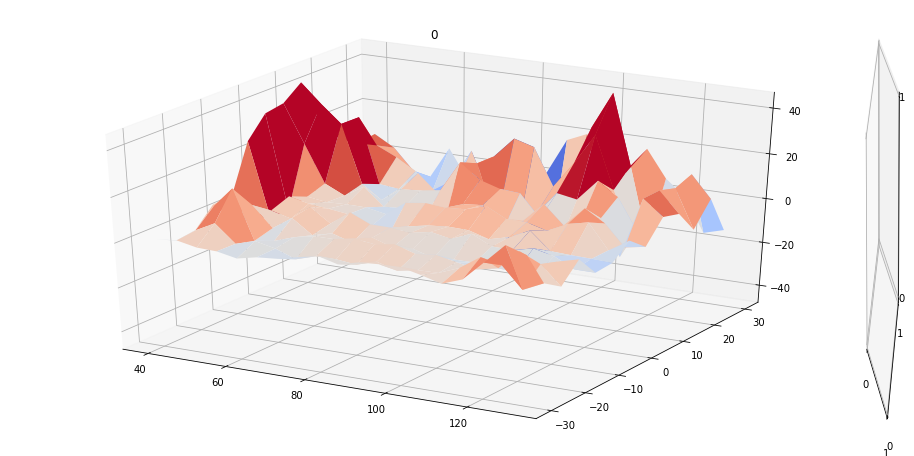

In [8]:
ds = xr.open_dataset('D:\chandrima_sample_plot\dailyclim_ncep_daily_omega.1981_2010.nc')
ds = ds.sel(lon=slice(40,130),lat=slice(30,-30))

time = pd.date_range('2000-01-01',periods=366,freq='D')
ds = ds.assign_coords(dayofyear=time)

#ds = ds.drop_dims('dayofyear')

ds = ds.resample(dayofyear='1M').mean(dim='dayofyear')

X,Y = np.meshgrid(ds.lon[::2],ds.lat[::2])

fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection='3d')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

#text = ax.text(0,0,0)

def update(iternum):
    ax.clear()
    ax.set_title(iternum)
    
    p = ax.plot_surface(X,Y,-500*ds.omega[iternum,0,::2,::2].values.reshape(X.shape),
               cmap = cm.coolwarm,vmin=-15,vmax=15)
    #p = ax.contourf(curVals, vmax=vmax, vmin=vmin, levels=levels)
    #fig.colorbar(p, cax=cax) # Colorbar does not update
    #ax.invert_zaxis()

    

ani = animation.FuncAnimation(fig, update, frames=12, interval=500, blit=False,
                              repeat_delay=2000)
plt.show()

In [10]:
!cd

D:\chandrima_sample_plot
